# Import Necessary Libraries

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:07<00:00, 22094813.05it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Let us show some of the training images.



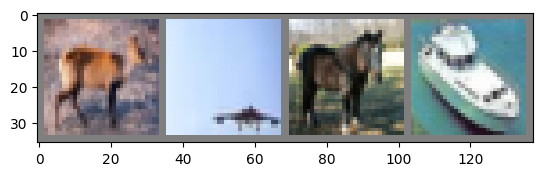

deer  plane horse ship 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

# Convolutional Neural Network



## First Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 4, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(4 * 16 * 16, 10)


    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


net = Net()

In [ ]:
num_params = sum(p.numel() for p in net.parameters())
print("number of parameters in the model: ", num_params)

number of parameters in the model:  10362


## second model

In [ ]:
import torch
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(TinyCNN4, self).__init__()
        self.conv1 = nn.Conv2d(3, 4, kernel_size=5, stride=1, padding=2)
        self.relu = nn.ReLU()
        self.fc = nn.Linear(4 * 32 * 32, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


In [ ]:
num_params = sum(p.numel() for p in net.parameters())
print("number of parameters in the model: ", num_params)

number of parameters in the model:  10362


## third model

In [ ]:
## Third model

In [ ]:
import torch
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(TinyCNN1, self).__init__()
        self.conv1 = nn.Conv2d(3, 4, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.fc = nn.Linear(4 * 32 * 32, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


In [ ]:
num_params = sum(p.numel() for p in net.parameters())
print("number of parameters in the model: ", num_params)

number of parameters in the model:  10362


## fourth model

In [ ]:
import torch
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(TinyCNN3, self).__init__()
        self.conv1 = nn.Conv2d(3, 2, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.fc = nn.Linear(2 * 64 * 64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


In [ ]:
num_params = sum(p.numel() for p in net.parameters())
print("number of parameters in the model: ", num_params)

number of parameters in the model:  10362


## fifth model

In [ ]:
import torch
import torch.nn as nn

class TinyCNN1(nn.Module):
    def __init__(self):
        super(TinyCNN1, self).__init__()
        self.conv1 = nn.Conv2d(3, 4, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.fc = nn.Linear(4 * 32 * 32, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


In [ ]:
num_params = sum(p.numel() for p in net.parameters())
print("number of parameters in the model: ", num_params)

number of parameters in the model:  10362


# Loss Function

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Model Training





In [ ]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.284
[1,  4000] loss: 1.255
[1,  6000] loss: 1.285
[1,  8000] loss: 1.263
[1, 10000] loss: 1.289
[1, 12000] loss: 1.271
[2,  2000] loss: 1.275
[2,  4000] loss: 1.274
[2,  6000] loss: 1.274
[2,  8000] loss: 1.272
[2, 10000] loss: 1.280
[2, 12000] loss: 1.269
[3,  2000] loss: 1.288
[3,  4000] loss: 1.263
[3,  6000] loss: 1.273
[3,  8000] loss: 1.276
[3, 10000] loss: 1.263
[3, 12000] loss: 1.271
[4,  2000] loss: 1.290
[4,  4000] loss: 1.270
[4,  6000] loss: 1.271
[4,  8000] loss: 1.262
[4, 10000] loss: 1.270
[4, 12000] loss: 1.277
[5,  2000] loss: 1.254
[5,  4000] loss: 1.269
[5,  6000] loss: 1.276
[5,  8000] loss: 1.279
[5, 10000] loss: 1.275
[5, 12000] loss: 1.286
[6,  2000] loss: 1.273
[6,  4000] loss: 1.261
[6,  6000] loss: 1.283
[6,  8000] loss: 1.266
[6, 10000] loss: 1.277
[6, 12000] loss: 1.277
[7,  2000] loss: 1.262
[7,  4000] loss: 1.270
[7,  6000] loss: 1.272
[7,  8000] loss: 1.277
[7, 10000] loss: 1.273
[7, 12000] loss: 1.287
[8,  2000] loss: 1.273
[8,  4000] 

Let's quickly save our trained model:

